In [199]:
from cvxopt import matrix, solvers
import cvxpy as cp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [200]:
# To make the graphs look better
import seaborn as sns
sns.set_style('whitegrid')

# Vanilla Implementation of SVM with cvxpy

In [201]:
labels = ['x1', 'x2']
X_ = pd.read_csv('Xsvm.csv', names = labels)
y_ = pd.read_csv('ysvm.csv', names = ['target'])

In [202]:
y = np.array(y_)
X = np.c_[np.ones((len(X_), 1)), X_]
w = cp.Variable((3,1))
# Added ones to X and an extra variable to w to deal with the bias

In [203]:
constraints = []
for i in range(X.shape[0]):
        constraints += ([y[i]*(X[i]@w) >= 1])
objective = cp.Minimize(cp.norm(w)**2)
prob = cp.Problem(objective, constraints)

In [204]:
prob.solve()
w = w.value

In [205]:
def plot_separator(w, b): 
    slope = -w[0] / w[1]
    intercept = -b / w[1]
    x = np.arange(-3, 4)
    plt.plot(x, x * slope + intercept, '--', label = 'Seperating Hyperplane')

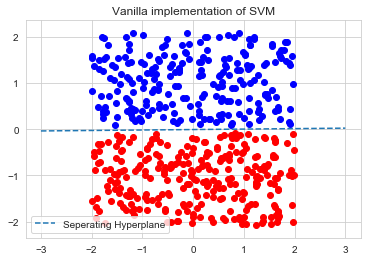

In [206]:
for i in range(X_.shape[0]):
    if y_['target'].iloc[i] == 1.0:
        plt.scatter(X_['x1'].iloc[i], X_['x2'].iloc[i], color = 'blue')
    else:
        plt.scatter(X_['x1'].iloc[i], X_['x2'].iloc[i], color = 'red')
plot_separator(w[1:],w[0])
plt.title('Vanilla implementation of SVM')
plt.legend()
plt.show()

# Kernel Implementation of SVM with cvxopt

In [209]:
# Solving the dual form, converting it to standard quadratic problem (See solvers.qp()) 
x, y = np.array(X_[['x1', 'x2']]), np.array(y_['target'])

In [210]:
K = y[:, None] * x # Can apply other kernels as well depending on non-linearity of data
K = K@K.T
P = matrix(K)
q = matrix(-np.ones((x.shape[0], 1)))
G = matrix(-np.eye(x.shape[0]))
h = matrix(np.zeros(x.shape[0]))
A = matrix(y.reshape(1, -1))
b = matrix(np.zeros(1))
solvers.options['show_progress'] = False
sol = solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])

In [211]:
# Get weights
w = np.sum(alphas * y[:, None] * x, axis = 0)
# Get bias
cond = (alphas > 1e-4).reshape(-1)
b = y[cond] - np.dot(x[cond], w)
bias = b[0]

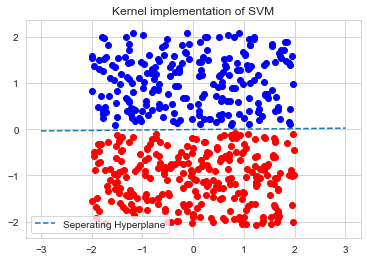

In [212]:
for i in range(X_.shape[0]):
    if y_['target'].iloc[i] == 1.0:
        plt.scatter(X_['x1'].iloc[i], X_['x2'].iloc[i], color = 'blue')
    else:
        plt.scatter(X_['x1'].iloc[i], X_['x2'].iloc[i], color = 'red')
plot_separator(w, bias)
plt.title('Kernel implementation of SVM')
plt.legend()
plt.show()